# PROYECTO DE ANÁLISIS DE ALGORITMOS - Segundo punto
(MST). Dado un grafo G = (V, E) con n vértices y m aristas. (El grafo podría representar una red telefónica). Cada arista es coloreada azul o roja. También está dado un parámetro k como parte de la entrada. Proponga un algoritmo que encuentre un árbol de expansión sobre G con exactamente k aristas azules, y exactamente n-k-1 aristas rojas. Determine el tiempo de ejecución del algoritmo y muestre que es correcto.


# Cálculo del arból de mínima expansión con k aristas azules y n-k-1 aristas rojas

In [35]:
import numpy as np
import networkx as nx

global M
global grafo
import matplotlib.pyplot as plt
def inicio(k,matriz,color,totalNodos):
    global M
    global grafo
    visitados= np.zeros((totalNodos))
    nombresNodo= np.zeros((totalNodos))
    for i in range(totalNodos):
        nombresNodo[i]=int(i)
    G=nx.Graph()
    acum=0
    azules=0
    rojas=0
    nodoActual=0
    M=np.ones((k+1,totalNodos-k))*float('inf')
    auxRojo=float('inf')
    auxAzul=float('inf')
    posRojo=-1
    posAzul=-1
    for i in range(totalNodos):            
        if (color[nodoActual,i]==0):
            if matriz[nodoActual,i]<auxAzul and matriz[nodoActual,i]!=float('inf'):
                auxAzul=matriz[nodoActual,i]
                posAzul=i
        if(color[nodoActual,i]==1):
            if matriz[nodoActual,i]<auxRojo and matriz[nodoActual,i]>0:
                auxRojo=matriz[nodoActual,i]
                posRojo=i
                
    visitados[nodoActual]=1
    visitados2 = [];
    for l in visitados:
        visitados2.append(l);
    punto2(k,matriz,color,azules,rojas,posAzul,totalNodos,acum,G,nombresNodo,visitados)

    punto2(k,matriz,color,azules,rojas,posRojo,totalNodos,acum,G,nombresNodo,visitados2)
    #print ('Solucion: ',M[k,totalNodos-k-1])
    aristasRojas=[]
    aristasAzules=[]
    for e in grafo.edges_iter():
        if color[e[0]][e[1]]==1:
            aristasRojas.append(e)
        if color[e[0]][e[1]]==0:
            aristasAzules.append(e)
            
    #print ('Azules: ',aristasAzules)
    #print ('Rojas: ',aristasRojas)
    #nx.draw(grafo,with_labels = True)
    
    #plt.show()
    
def punto2(k,matriz,color,azules,rojas,nodoActual,totalNodos,acum,G,nombresNodo,visitados):
    global M
    global grafo
    visitados[nodoActual]=1
    visitados2 = [];
    for l in visitados:
        visitados2.append(l);
    visitados3 = [];
    for l in visitados:
        visitados3.append(l);

    auxRojo=float('inf')
    auxAzul=float('inf')
    posRojo=-1
    posAzul=-1
    for i in range(totalNodos):            
        if visitados[i]==1 :
            if (color[nodoActual,i]==0):
                if matriz[nodoActual,i]<auxAzul and matriz[nodoActual,i]>0:
                    auxAzul=matriz[nodoActual,i]
                    posAzul=i
            if(color[nodoActual,i]==1):
                if matriz[nodoActual,i]<auxRojo and matriz[nodoActual,i]>0:
                    auxRojo=matriz[nodoActual,i]
                    posRojo=i
    G2=nx.Graph()
    G2.add_edges_from(G.edges());
    G3=nx.Graph()
    G3.add_edges_from(G.edges());
    
    if azules<k:
        if posAzul!=-1:
            if M[azules+1,rojas]>(acum+auxAzul):
                M[azules+1,rojas]=acum+auxAzul
                G2.add_edge(nombresNodo[nodoActual],nombresNodo[posAzul],r=auxAzul,color='b')
                if azules+1==k and rojas==(totalNodos-k-1):
                    grafo=G2
                else:
                    sig=siguiente(visitados3, matriz,totalNodos)
                    if sig!=-1:
                        az = azules;
                        ro = rojas;
                        punto2(k,matriz,color,az+1,ro,sig,totalNodos,acum+auxAzul,G2,nombresNodo,visitados3)
                        
                    
    if rojas<(totalNodos-k-1):
        if posRojo!=-1:
            if M[azules,rojas+1]>(acum+auxRojo):
                M[azules,rojas+1]=acum+auxRojo
               
                G3.add_edge(nombresNodo[nodoActual],nombresNodo[posRojo],r=auxRojo,color='r')
                if azules==k and rojas+1==(totalNodos-k-1):
                    grafo=G
                else:
                    sig=siguiente(visitados2, matriz,totalNodos)
                    if sig!=-1:
                        az = azules;
                        ro = rojas;
                        punto2(k,matriz,color,az,ro+1,sig,totalNodos,acum+auxRojo,G3,nombresNodo,visitados2)


def siguiente(visitados, matriz, total):
    for i in range(total):
        if visitados[i]==1:
            for j in range(total):
                if matriz[i,j]!=0:
                    if visitados[j]==0:
                        return j
    return -1

# Lectura de archivos

In [9]:
def leer(archivo):
    file = open(archivo, "r") 
    totalNodos=int(file.readline())
    k=int(file.readline())
    matriz=np.zeros((totalNodos, totalNodos))
    color=np.zeros((totalNodos, totalNodos))-1
    contColum=-1
    for i in range(totalNodos):
        words = file.readline().split()
        contColum+=1
        cont=contColum
        for w in words:
            if w!="Inf":
                matriz[i][cont]=w[0]
                matriz[cont][i]=w[0]
                if w[2]=="R":
                    color[i][cont]=1
                    color[cont][i]=1
                elif w[2]=="B":
                    color[i][cont]=0
                    color[cont][i]=0
            cont+=1
    return (totalNodos,k,matriz,color)

# Caso 1

In [13]:
import numpy as np
import networkx as nx

totalNodos,k,matriz,color=leer("input_n8_b4_r3")
inicio(k,matriz,color,totalNodos)

('Solucion: ', 21.0)
('Azules: ', [(0.0, 4.0), (1.0, 3.0), (2.0, 6.0), (6.0, 7.0)])
('Rojas: ', [(0.0, 2.0), (1.0, 2.0), (1.0, 5.0)])


C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Caso 2

In [14]:
import numpy as np
import networkx as nx


totalNodos,k,matriz,color=leer("input_n8_b5_r2")
inicio(k,matriz,color,totalNodos)

('Solucion: ', 22.0)
('Azules: ', [(0.0, 4.0), (1.0, 3.0), (2.0, 4.0), (2.0, 6.0), (6.0, 7.0)])
('Rojas: ', [(1.0, 2.0), (1.0, 5.0)])


C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Análisis de Complejidad

In [57]:
import random
import numpy as np
import time
import pylab as pl
%matplotlib inline

def llenar(n):
    mat = np.zeros((n , n) );
    mat1 = np.zeros((n , n) );
    for i in range(n):
        for j in range(i,n):
            if(i != j):
                a = random.randrange(0.0,100.0)
                if(a < 10):
                    mat[i,j] = 0;
                    mat[j,i] = 0;
                    mat1[i,j] = -1;
                    mat1[j,i] = -1;
                else:              
                    mat[i,j] = a;
                    mat[j,i] = a;
                    if(a < 50):
                        mat1[i,j] = 0;
                        mat1[j,i] = 0;
                    else:
                        mat1[i,j] = 1;
                        mat1[j,i] = 1;
            else:
                mat[i,j] = 0
                mat1[i,j] = -1;
    return mat, mat1;

def llenar1(n):
    results = []
    for i in range(4, n+1):
        matriz, color = llenar(i)
        for j in range(2,i-1):
            tic = time.clock()
            inicio(j,matriz,color,i);
            toc = time.clock()
            results.append((toc-tic)*100)
    return results


C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


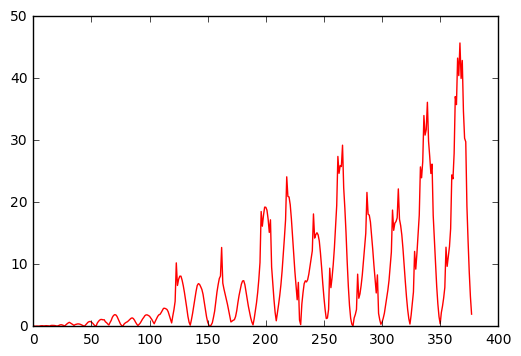

In [58]:
resultados = llenar1(30);
x = np.arange(len(resultados))
y = np.array(resultados)
pl.plot(x, y,color='red')  